# MOSFET gm/ID Lookup for IHP SG13G2 in Triode Region

**Copyright 2024 Harald Pretl and Michael Koefinger**

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0

In [1]:
from pygmid import Lookup as lk
import numpy as np
import matplotlib.pyplot as plt
lv_nmos = lk('sg13_lv_nmos.mat')
lv_pmos = lk('sg13_lv_pmos.mat')

In [2]:
# sweep source potential
VS = np.arange(0.2,1.41,0.01)

# NMOS lookup
VG_n = 1.5
VB_n = 0
VSB_n = VS - VB_n
VGS_n = VG_n - VS
gds_n = lv_nmos.lookup('GDS', L=0.13, VGS=VGS_n, VDS=0.01, VSB=VSB_n)

# PMOS lookup
VG_p = 0
VB_p = 1.5
VSB_p = np.abs(VS - VB_p)
VGS_p = np.abs(VG_p - VS)
gds_p = lv_pmos.lookup('GDS', L=0.13, VGS=VGS_p, VDS=0.01, VSB=VSB_p)

# calc Ron per width
ron_n = 1/np.diag(gds_n)
ron_p = 1/np.diag(gds_p)
ron_w_n = ron_n*lv_nmos['W']
ron_w_p = ron_p*lv_pmos['W']
ron_w_tg = 1/(1/ron_w_n+1/ron_w_p)
ron_w_tg_3 = 1/(1/ron_w_n+3/ron_w_p)
ron_w_tg_2_6 = 1/(2/ron_w_n+6/ron_w_p)

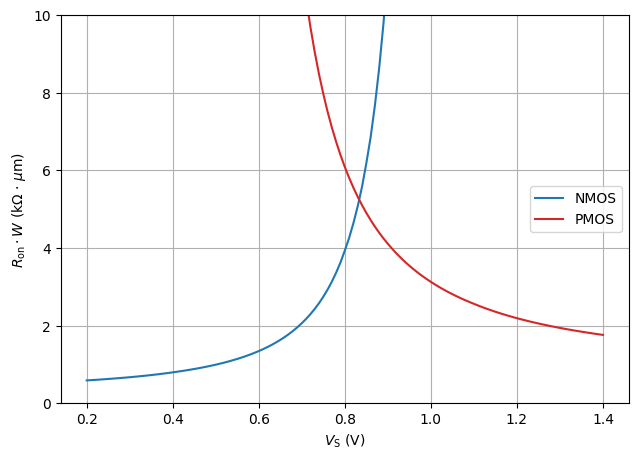

In [3]:
# plot Ron versus source potential
#| label: fig-triode-ron-vs-vsource-1
#| fig-cap: $R_\mathrm{on,n}$ and $R_\mathrm{on,p}$ as a function of the source voltage ($V_\mathrm{DS} = 10\,\text{mV}$).
fig, ax1 = plt.subplots()
ax1.grid(axis='both')
ax1.set_xlabel(r'$V_\mathrm{S}$ (V)')
ax1.set_ylabel(r'$R_\mathrm{on}\cdot W$ (k$\Omega$ $\cdot$ $\mu$m)')
ax1.plot(VS, ron_w_n/1e3, color = 'tab:blue', label = "NMOS")
ax1.plot(VS, ron_w_p/1e3, color = 'tab:red', label = "PMOS")
ax1.legend(loc='center right')
fig.tight_layout()
plt.ylim(0,10)
plt.show()

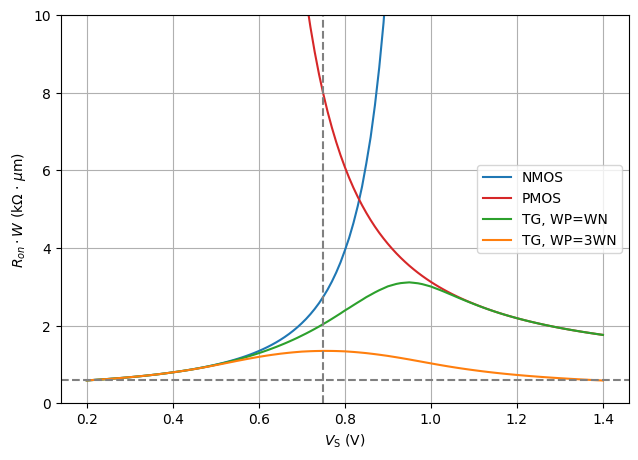

In [4]:
# plot Ron versus source potential
#| label: fig-triode-ron-vs-vsource-2
#| fig-cap: $R_\mathrm{on,n}$, $R_\mathrm{on,p}$ and $R_\mathrm{on,n} \parallel R_\mathrm{on,p}$ as a function of the source voltage ($V_\mathrm{DS} = 10\,\text{mV}$).
fig, ax1 = plt.subplots()
ax1.grid(axis='both')
ax1.set_xlabel(r'$V_\mathrm{S}$ (V)')
ax1.set_ylabel(r'$R_{on}\cdot W$ (k$\Omega$ $\cdot$ $\mu$m)')
ax1.plot(VS, ron_w_n/1e3, color = 'tab:blue', label = "NMOS")
ax1.plot(VS, ron_w_p/1e3, color = 'tab:red', label = "PMOS")
ax1.plot(VS, ron_w_tg/1e3, color = 'tab:green', label = "TG, WP=WN")
ax1.plot(VS, ron_w_tg_3/1e3, color = 'tab:orange', label = "TG, WP=3WN")
ax1.legend(loc='center right')
fig.tight_layout()
plt.ylim(0,10)
plt.axvline(0.75, color = 'grey', linestyle = '--')
plt.axhline(np.min(ron_w_n)/1e3, color = 'grey', linestyle = '--')
plt.show()

In [5]:
# sweep source potential
#VS = np.arange(0.,1.5,0.01)

# NMOS lookup
VG_n = 0
VB_n = 0
VSB_n = VS - VB_n
VGS_n = VG_n - VS
cgs_n = lv_nmos.lookup('CGS', L=0.13, VGS=VGS_n, VDS=0.01, VSB=VSB_n)
cgd_n = lv_nmos.lookup('CGD', L=0.13, VGS=VGS_n, VDS=0.01, VSB=VSB_n)
css_n = lv_nmos.lookup('CSS', L=0.13, VGS=VGS_n, VDS=0.01, VSB=VSB_n)
cdd_n = lv_nmos.lookup('CDD', L=0.13, VGS=VGS_n, VDS=0.01, VSB=VSB_n)

# PMOS lookup
VG_p = 1.5
VB_p = 1.5
VSB_p = np.abs(VS - VB_p)
VGS_p = np.abs(VG_p - VS)
cgs_p = lv_nmos.lookup('CGS', L=0.13, VGS=VGS_p, VDS=0.01, VSB=VSB_p)
cgd_p = lv_nmos.lookup('CGD', L=0.13, VGS=VGS_p, VDS=0.01, VSB=VSB_p)
css_p = lv_nmos.lookup('CSS', L=0.13, VGS=VGS_p, VDS=0.01, VSB=VSB_p)
cdd_p = lv_nmos.lookup('CDD', L=0.13, VGS=VGS_p, VDS=0.01, VSB=VSB_p)

#  calc Coff per width
#  ---S---||---G---||---D---
#     |                 |
#    ---  CSS          --- CDD
#    ---               ---
#     |                 |
#     B                 B

coff_n = 1/(1/np.diag(cgs_n)+1/np.diag(cgd_n))+1/(1/np.diag(css_n)+1/np.diag(cdd_n))
coff_p = 1/(1/np.diag(cgs_p)+1/np.diag(cgd_p))+1/(1/np.diag(css_p)+1/np.diag(cdd_p))
coff_w_n = coff_n/lv_nmos['W']
coff_w_p = coff_p/lv_pmos['W']


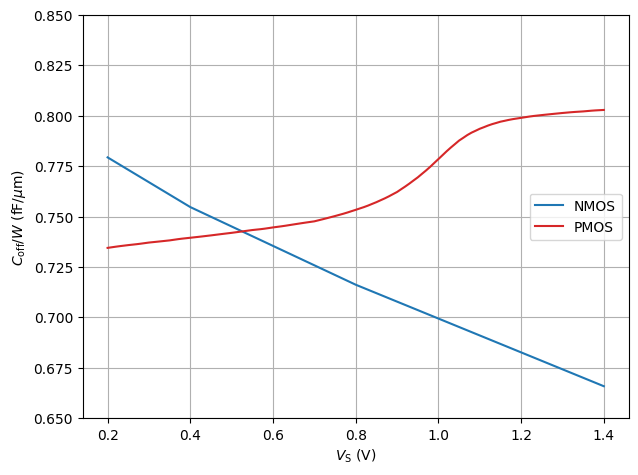

In [6]:
# plot Coff versus source potential
#| label: fig-triode-coff-vs-vsource
#| fig-cap: $C_\mathrm{off,n}$ and $C_\mathrm{off,p}$ as a function of the source voltage ($V_\mathrm{DS} = 10\,\text{mV}$).
fig, ax1 = plt.subplots()
ax1.grid(axis='both')
ax1.set_xlabel(r'$V_\mathrm{S}$ (V)')
ax1.set_ylabel(r'$C_\mathrm{off} / W$ (fF/$\mu$m)')
ax1.plot(VS, coff_w_n/1e-15, color = 'tab:blue', label = "NMOS")
ax1.plot(VS, coff_w_p/1e-15, color = 'tab:red', label = "PMOS")
ax1.legend(loc='center right')
fig.tight_layout()
plt.ylim(0.65,0.85)
plt.show()

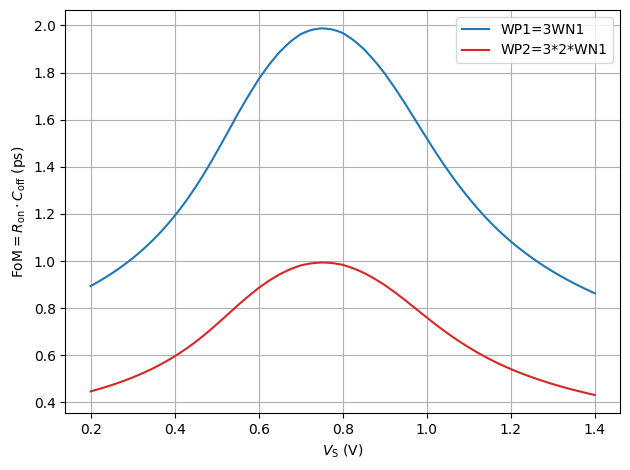

In [7]:
# plot Ron*Coff versus source potential
#| label: fig-triode-fom-vs-vsource
#| fig-cap: $C_\mathrm{off,n}$ and $C_\mathrm{off,p}$ as a function of the source voltage ($V_\mathrm{DS} = 10\,\text{mV}$).
fig, ax1 = plt.subplots()
ax1.grid(axis='both')
ax1.set_xlabel(r'$V_\mathrm{S}$ (V)')
ax1.set_ylabel(r'$\text{FoM}=R_\mathrm{on} \cdot C_\mathrm{off}$ (ps)')
ax1.plot(VS, ron_w_tg_3*(coff_w_n+coff_w_p)/1e-12, color = 'tab:blue', label = "WP1=3WN1")
ax1.plot(VS, ron_w_tg_2_6*(coff_w_n+coff_w_p)/1e-12, color = 'tab:red', label = "WP2=3*2*WN1")
ax1.legend(loc='upper right')
fig.tight_layout()
plt.show()